**Energy Predicting Future Energy Consumption using Linear Regression and LSTM**

In [1]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/drwiiche/electricity-consumption/master/AEP_hourly.csv"

# Read the CSV file directly into a DataFrame
df = pd.read_csv(url)

# Display the DataFrame
df.head()


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [3]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

C:\Users\R.Vejay\AppData\Local\Temp\ipykernel_110108\3318638198.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


C:\Users\R.Vejay\AppData\Local\Temp\ipykernel_110108\2760412893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Ennergy Distribution')

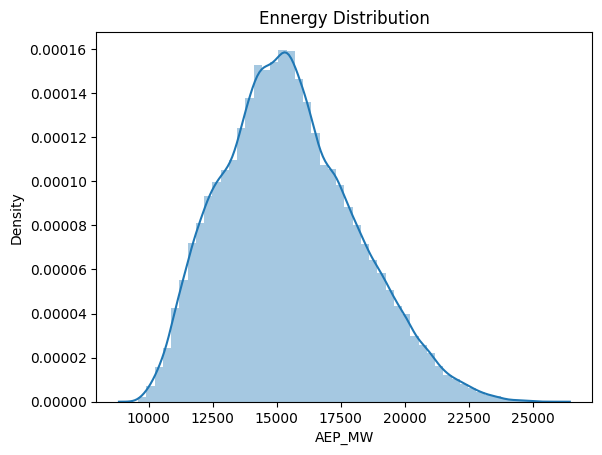

In [4]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Your code here, where you use MinMaxScaler

NewDataSet = dataset.resample('D').mean()
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)
Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)
(4935, 60, 1)
(4935, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout

# Your code here, where you use Sequential, LSTM, and other Keras components

# Your code here, where you use Sequential and other Keras components

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 10, batch_size = 16)

In [28]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
# W need to Reshape
inputs = inputs.reshape(-1,1)
# Normalize the Dataset
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
# Convert into Numpy Array
X_test = np.array(X_test)
# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Pass to Model
predicted_stock_price = regressor.predict(X_test)
# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

4/4 [==============================] - 0s 26ms/step


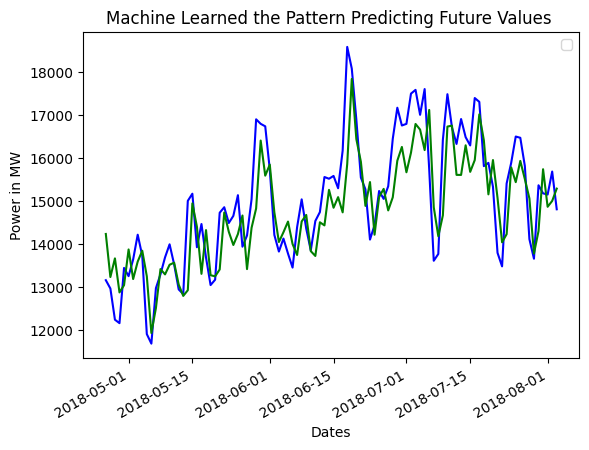

In [29]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="blue")
plt.plot(x,y1, color="green")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()